#### **Modules**

In [2]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

##### ***More info:*** https://scikit-learn.org/stable/

## **Linear Scaling**
We use this operation to convert symmetric data from any value to the range of $[-1, 1]$, to make this we have multiple ways to do it:
- **Min-Max:** Transform the value: $x_s=\frac{2x-min-max}{max-min}$
- **Clipping:** Put the outlier values to the min or max values: The range is $[2.0, 4.0]$ then $3.8 \rightarrow 3.8$, $6.0 \rightarrow 4.0$ and $1.0 \rightarrow 2.0$
- **Z-Score:** Include almost all the outliers: $x_s=\frac{x-\mu}{\sigma}$

##### ***Note***
We use:
- **Max-Min scaling**: For disordered data.
- **Z-Score scaling**: For normal distributions and ordered data.

Text(0.5, 1.0, 'Ordered distribution')

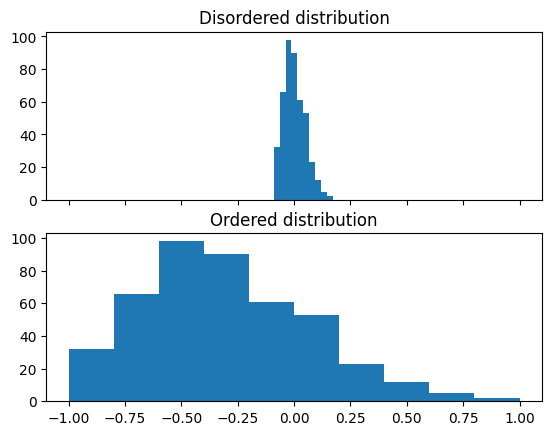

In [9]:
#>> DF and Charts
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw-max_raw-min_raw)/(max_raw-min_raw)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(raw)
ax[0].set_title("Disordered distribution")
ax[1].hist(scaled)
ax[1].set_title("Ordered distribution")

In [11]:
#>> Linear Scaling
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
    
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [15]:
#>> How many time it takes
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print(f"Train Raw: {raw_time}")
print(f"Train Scaled: {scaled_time}")

Train Raw: 0.24702840000099968
Train Scaled: 0.2291666000000987


## **No Linear Scaling**
We use this operation to convert asymmetric data that is unreadable, the objective is to symmetrize the data by giving it an order, some examples to make **No linear scaling** are: *Polynomial, Trigonometric and Logarithmic functions*. Some examples to solve them are:
- **Hiperbolic tangent:** This function help us to put the values in a range of $[-1, 1]$.
- **Square root:** This operation helps to identify the distribution of the values.

In [18]:
#DataFrame
df = pd.read_csv('data-set.csv')

<Axes: >

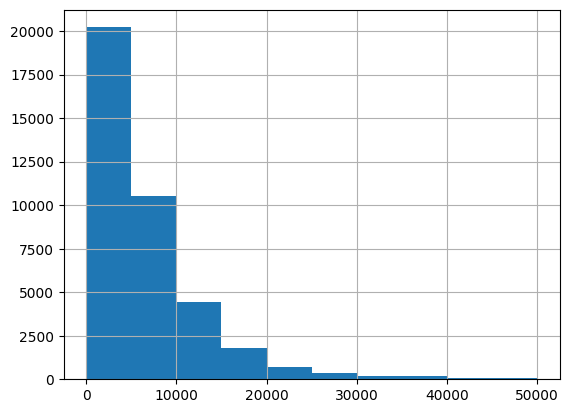

In [19]:
#Histogram
df.price_usd.hist()

<Axes: >

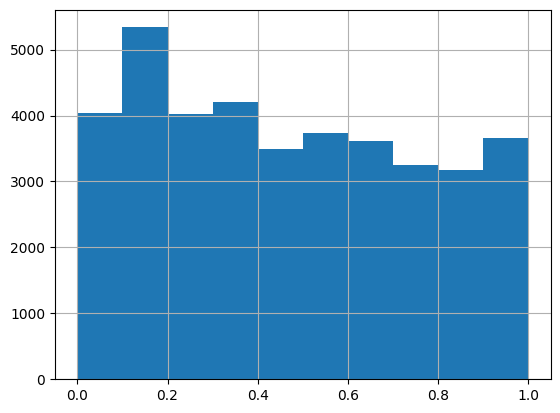

In [23]:
#Transform with Hiperbolic Tangent
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()